In [1]:
# 단어 수준으로 원-핫 인코딩
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10

results = np.zeros(shape = (len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [2]:
# 형태소 수준으로 원-핫 인코딩
import string

characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys())+ 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [5]:
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [6]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6683 - acc: 0.6269 - val_loss: 0.6183 - val_acc: 0.6990
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5422 - acc: 0.7519 - val_loss: 0.5265 - val_acc: 0.7336
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4619 - acc: 0.7884 - val_loss: 0.5004 - val_acc: 0.7416
Epoch 4/10
625/625 [==============================] - 1s 973us/step - loss: 0.4212 - acc: 0.8099 - val_loss: 0.4928 - val_acc: 0.7498
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3926 - acc: 0.8257 - val_loss: 0.4930 - val_acc: 0.7556
Epoch 6/10
625/625 [==============================] - 1s 922us/step - loss: 0.3694 - acc: 0.8391 - val_loss: 0.4967 - val_acc: 0.7550
Epoch 7/10
625/625 [==============================] - 1s 956us/step - loss: 0.3495 - acc: 0.8498 - val_loss: 0.5009 - val_acc: 0.7564
Epoch 8/10
625/625 [==============================] - 1s 960us/step - 

In [3]:
import os
imdb_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf-8') 
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen = maxlen)

Found 88582 unique tokens.


In [7]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [19]:
glove_dir = 'C:/Workspace/python/Data_Science/dataA/분반(A반)/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [23]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [26]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_val, y_val))
model.save_weights('C:/Workspace/python/Data_Science/dataA/분반(A반)/aclImdb/models/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 103ms/step - loss: 1.8753 - acc: 0.5050 - val_loss: 0.6929 - val_acc: 0.5136
Epoch 2/10
7/7 [==============================] - 0s 73ms/step - loss: 0.6034 - acc: 0.6950 - val_loss: 1.5905 - val_acc: 0.5020
Epoch 3/10
7/7 [==============================] - 0s 61ms/step - loss: 0.7227 - acc: 0.6750 - val_loss: 0.7607 - val_acc: 0.5024
Epoch 4/10
7/7 [==============================] - 0s 68ms/step - loss: 0.4102 - acc: 0.8200 - val_loss: 0.7100 - val_acc: 0.5394
Epoch 5/10
7/7 [==============================] - 0s 61ms/step - loss: 0.4367 - acc: 0.8450 - val_loss: 0.7342 - val_acc: 0.5323
Epoch 6/10
7/7 [==============================] - 0s 62ms/step - loss: 0.2224 - acc: 0.9600 - val_loss: 1.0169 - val_acc: 0.5180
Epoch 7/10
7/7 [==============================] - 0s 63ms/step - loss: 0.3391 - acc: 0.8350 - val_loss: 0.9607 - val_acc: 0.5267
Epoch 8/10
7/7 [==============================] - 0s 61ms/step - loss: 0.0877 - acc: 0.9950 - va

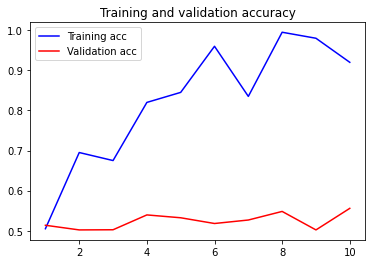

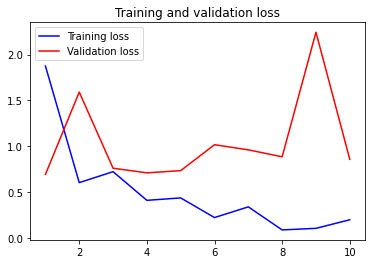

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = [x_val, y_val])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 68ms/step - loss: 0.6952 - acc: 0.5250 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 54ms/step - loss: 0.5307 - acc: 0.9900 - val_loss: 0

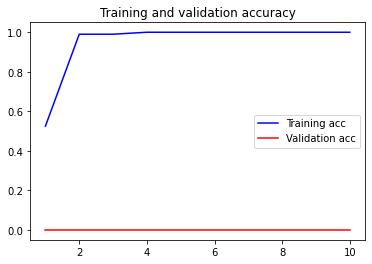

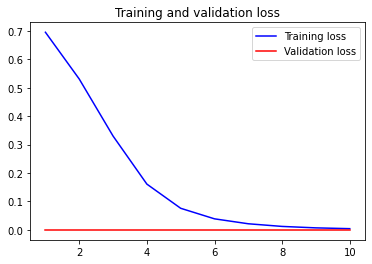

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 1000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [40]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 1, batch_size = 128, validation_split = 0.2)

157/157 [==============================] - 18s 109ms/step - loss: 0.6822 - acc: 0.5487 - val_loss: 0.6635 - val_acc: 0.5910


In [41]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 47s 283ms/step - loss: 0.5488 - acc: 0.7264 - val_loss: 0.3959 - val_acc: 0.8362
Epoch 2/10
157/157 [==============================] - 42s 270ms/step - loss: 0.3850 - acc: 0.8379 - val_loss: 0.3915 - val_acc: 0.8338
Epoch 3/10
157/157 [==============================] - 43s 274ms/step - loss: 0.3582 - acc: 0.8497 - val_loss: 0.3616 - val_acc: 0.8534
Epoch 4/10
157/157 [==============================] - 42s 265ms/step - loss: 0.3426 - acc: 0.8609 - val_loss: 0.3507 - val_acc: 0.8558
Epoch 5/10
157/157 [==============================] - 41s 262ms/step - loss: 0.3357 - acc: 0.8637 - val_loss: 0.3377 - val_acc: 0.8598
Epoch 6/10
157/157 [==============================] - 41s 264ms/step - loss: 0.3244 - acc: 0.8653 - val_loss: 0.3359 - val_acc: 0.8602
Epoch 7/10
157/157 [==============================] - 46s 292ms/step - loss: 0.3203 - acc: 0.8677 - val_loss: 0.3397 - val_acc: 0.8548
Epoch 8/10
157/157 [==============================] - 4

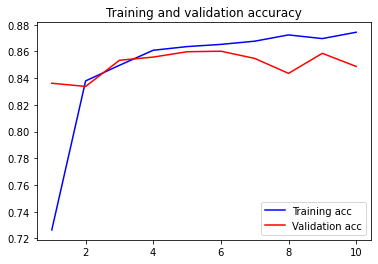

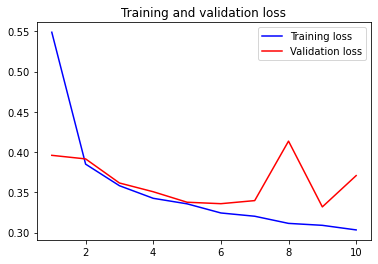

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()